In [1]:
import seaborn as sns

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\HP\Desktop\Homework\911.csv'
df = pd.read_csv(file_path)
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

In [3]:
# Show dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB
None


In [4]:
# Top 5 zip codes with most 911 calls
print("Top 5 Zip Codes with most 911 calls:")
print(df['zip'].value_counts().head())

Top 5 Zip Codes with most 911 calls:
zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64


In [5]:
# Top 5 towns (cities) with most 911 calls
print("Top 5 Townships with most 911 calls:")
print(df['twp'].value_counts().head())

Top 5 Townships with most 911 calls:
twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


In [6]:
# Number of unique issues (calls for different titles)
print("Number of unique issues (title):")
print(df['title'].nunique())

Number of unique issues (title):
110


In [7]:
# Create a new column 'Reason' from the 'title' column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [8]:
# Number of 911 calls for each Reason (EMS, Fire, Traffic)
print("Call counts for each Reason:")
print(df['Reason'].value_counts())

Call counts for each Reason:
Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64


In [9]:
# Display one of the data types in the time column before conversion
print("Type before conversion:", type(df['timeStamp'][0]))

Type before conversion: <class 'str'>


In [10]:
# Convert timeStamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
# Check the type after conversion
print("Type after conversion:", type(df['timeStamp'][0]))

Type after conversion: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
# Demonstrate datetime properties
time = df['timeStamp'].iloc[0]
print(df['timeStamp'].iloc[0])
print(time.hour)
print(time.minute)


2015-12-10 17:40:00
17
40


In [13]:
# Extract Hour, Month, Day of Week from timeStamp column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


In [14]:
# Map day of week numbers to names using dictionary
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [15]:
# Create pivot table: index = Day of Week, columns = Hour
dayHour = df.pivot_table(index='Day of Week', columns='Hour', values='Reason', aggfunc='count')


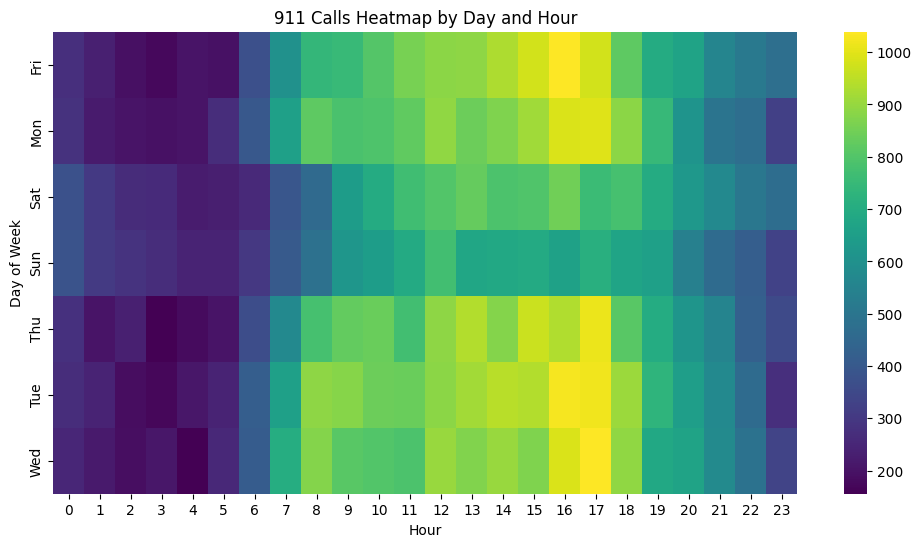

In [16]:
# Draw a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')
plt.title('911 Calls Heatmap by Day and Hour')
plt.show()


In [17]:
# Extract date from timeStamp and store in new column
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

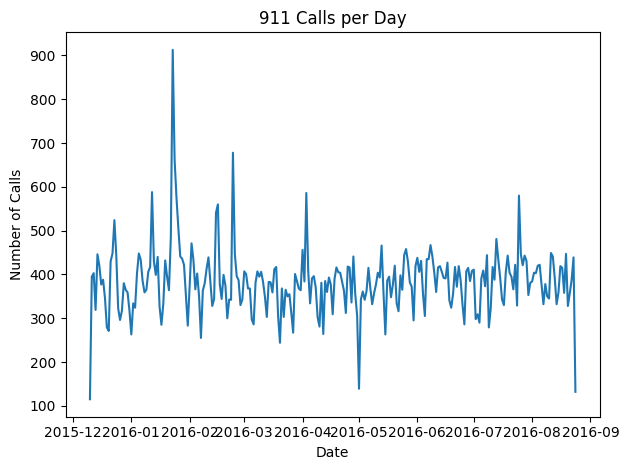

In [18]:
# Plot number of calls per day
df.groupby('Date').count()['twp'].plot()
plt.title('911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()